# Episode 1


In [1]:
import numpy as np
from PIL import Image

In [2]:
def contrast(path, num):
    img = Image.open(path)
    data = np.array(img)
    updated_data = np.around((data - data.min()) / (data.max() - data.min()) * 255).astype(np.uint8)
    res_img = Image.fromarray(updated_data)
    res_img.show()
    res_img.save("lunar0{}.jpg".format(num))

In [3]:
contrast("lunar01_raw.jpg", 1)

In [4]:
contrast("lunar02_raw.jpg", 2)

In [5]:
contrast("lunar03_raw.jpg", 3)


# Episode 2

In [6]:
from matplotlib import pyplot as plt

In [7]:
def read_file(file):
    res = []
    with open(file) as f:
        res = f.read().split()
    res = np.array(res , dtype=float)
    return res

In [8]:
files = ["signal01.dat", "signal02.dat", "signal03.dat"]
data1, data2, data3 = [read_file(file) for file in files]

In [9]:
x_asix = np.arange(0, len(data1))

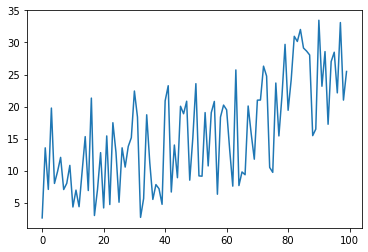

In [10]:
plt.plot(x_asix, data1)

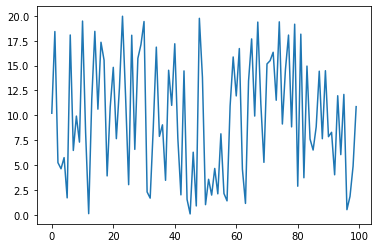

In [11]:
plt.plot(x_asix, data2)

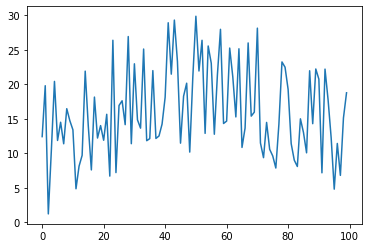

In [12]:
plt.plot(x_asix, data3)

In [13]:
def filter(data):
    res = np.empty(len(data))
    res[0] = data[0]
    for i in range(1, len(data)):
        if i < 10: 
            res[i] = np.mean(data[:i])
        else:
            res[i] = np.mean(data[i - 9: i + 1])
    return res

In [14]:
data1, data2, data3 = [read_file(file) for file in files]

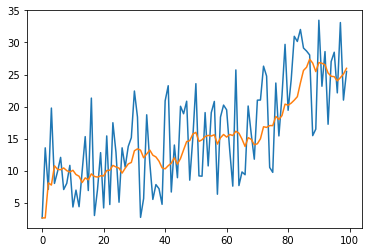

In [15]:
plt.plot(x_asix, data1)
plt.plot(x_asix, filter(data1))

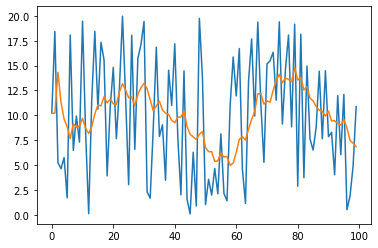

In [16]:
plt.plot(x_asix, data2)
plt.plot(x_asix, filter(data2))

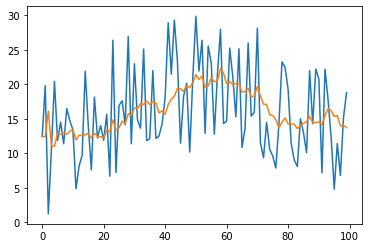

In [17]:
plt.plot(x_asix, data3)
plt.plot(x_asix, filter(data3))

# Episode 3


In [25]:
import matplotlib.animation as animation

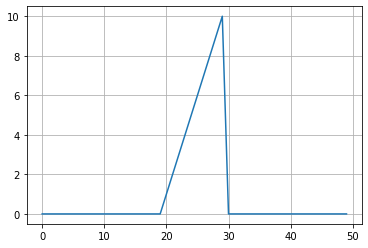

In [26]:
start_data = read_file("task3.dat")
plt.plot(start_data)
plt.grid()

In [27]:
def init_A(n=50):
    A = np.eye(n)
    for i in range(n):
        for j in range(n):
            if i == j+1:
                A[i, j] = - 1
    A[0, n-1] = -1
    return A

In [28]:
A = init_A(50)

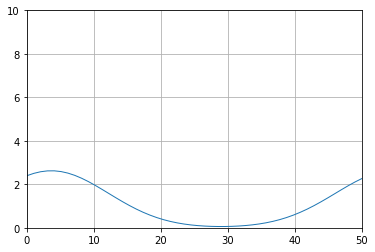

In [29]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(0, 10))
ax.grid()
line, = ax.plot([], [], lw=1)
u = [start_data]

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 50, 50)
    tmp = u[i] - 0.5 * A @ u[i]
    u.append(tmp)
    line.set_data(x, tmp)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=255, interval=5, blit=True)
 
 
anim.save('result.gif', writer='pillow')